# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [118]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [64]:
devices_data = pd.read_csv("used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

a. Viewing the first and last few rows of the dataset

In [5]:
devices_data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
devices_data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


Observation: The data contains categoric (brand_name, os, 4g, 5g),  int (release year and days used) and float (the rest of the columns) data.

b. Checking the shape of the data

In [9]:
devices_data.shape

(3454, 15)

Observation: The data contains 3454 rows and 15 columns

In [10]:
devices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation: 
* There are 9 float columns, 2 int columns and 4 categoric or object variables
* THe data only uses 404+ KB of memory which is small
* A few columns contain null values as evidenced by the total non null count being below 3454

c. Getting the statistical summary of the variables

In [12]:
devices_data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Statistical Observations:
* 50% of all devices have ram of 4GB
* Only 25% of the used devices have battery capacity of more than 4000mAH with the highest being 9720MaH
* The total number of days used has a wide range, spanning from 91days to 1094
* Internal memory for 75% of the used devices does not exceed 64GB. The maximum of 1024 shows the possibility of outliers
* Between 50 and 75% of the used devices fall within the average for each feature. For example screen size average is 13.7 which is between the 50th and 75th quartiles of 12.8 and 15.3 respectively. The same applys for weight with a mean of 182.7 which lies between 160 and 185 as the 50th and 75th quartiles.



In [51]:
devices_data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate Analysis

a. Histogram and Boxplot for all numeric features

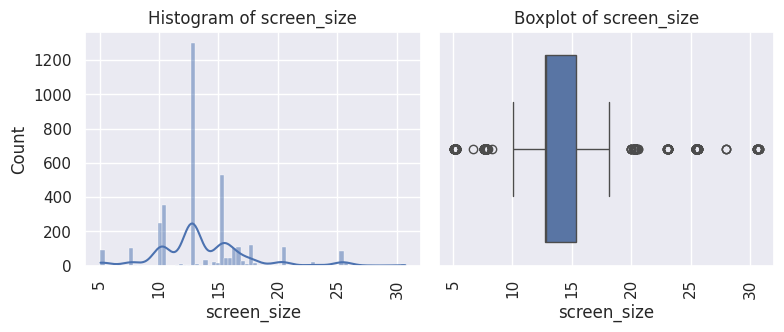

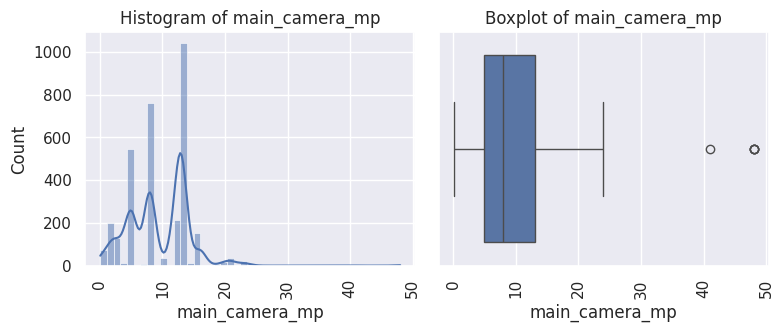

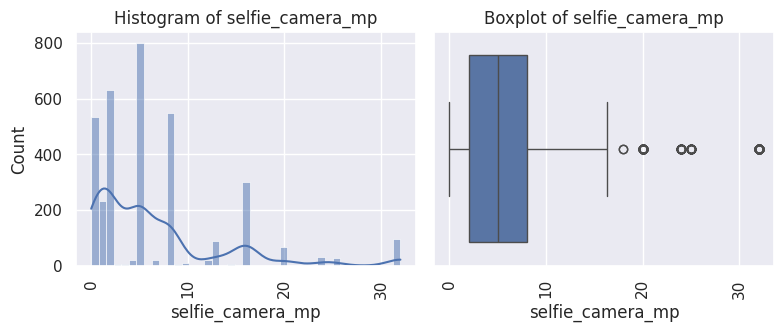

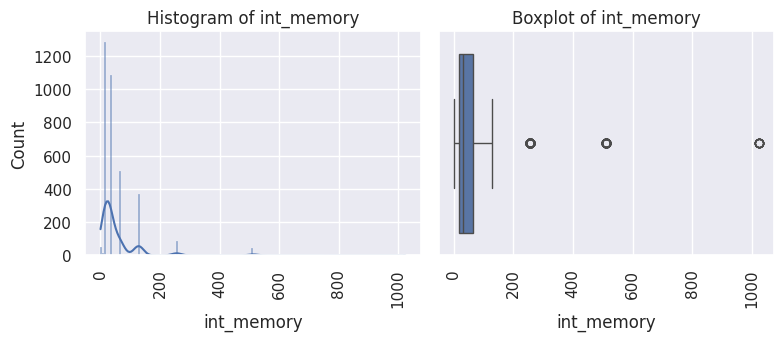

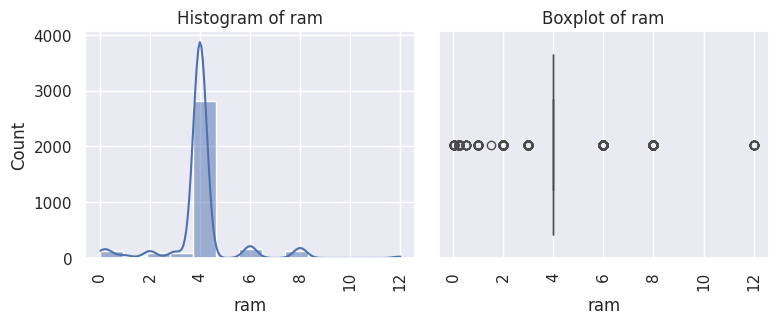

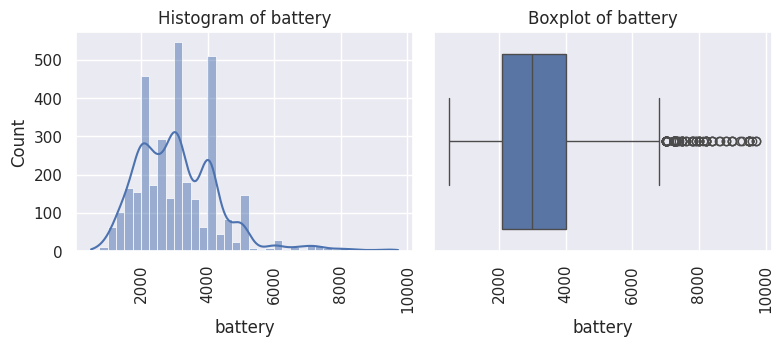

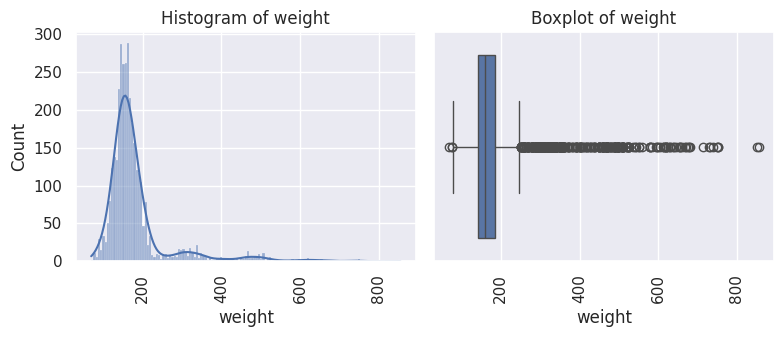

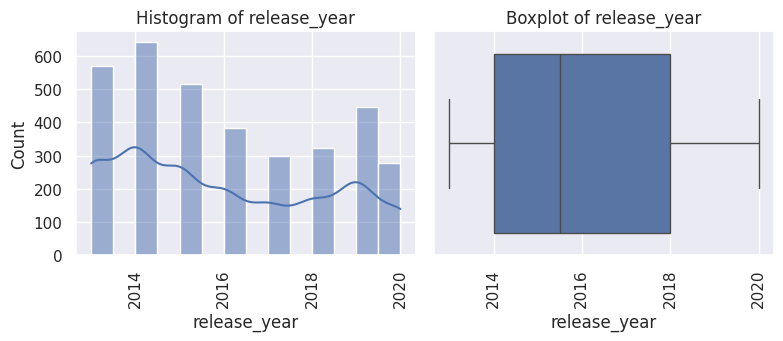

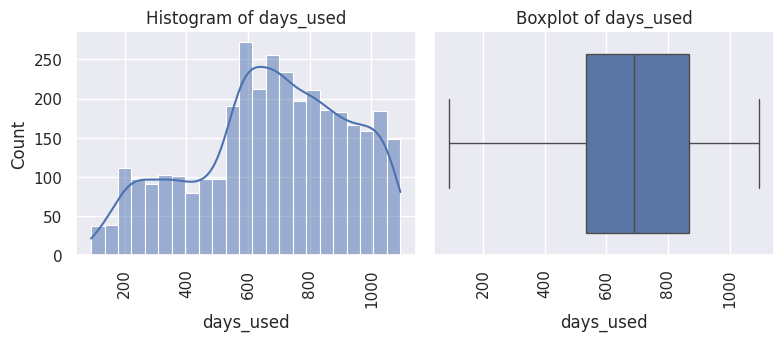

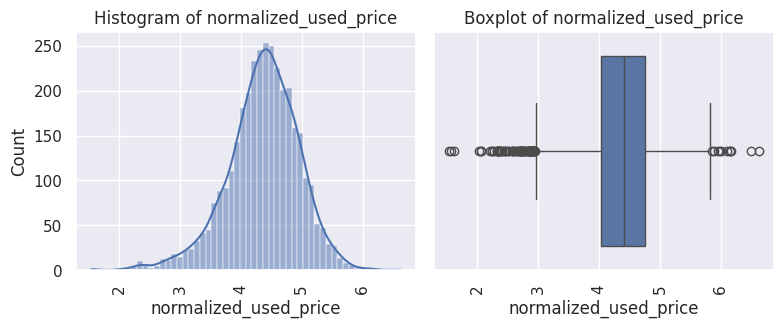

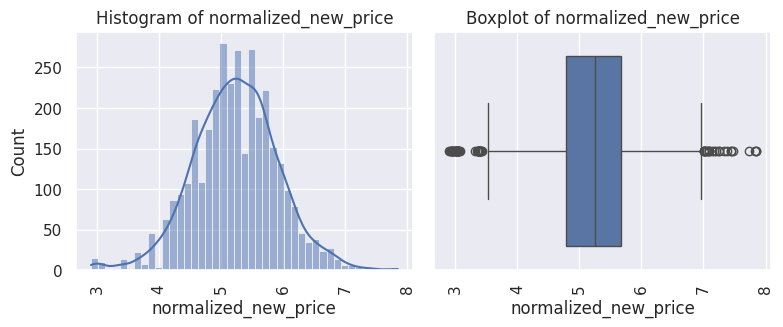

In [18]:
numeric_cols = devices_data.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    
    # Histogram plot
    plt.subplot(2, 2, 1)
    sns.histplot(data=devices_data, x=col, kde=True)
    plt.xticks(rotation=90)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(data=devices_data, x=col)
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

Univariate Analysis Observations
1. normalised_used_price and normalized_new_price are almost normally distributed as well as weight and ram
2. All of the features have outliers except for days_used and year released
3. Weight has many outliers skewed to the right.
4. Internal memory has 3 outliers which may need to be looked into.

### Univariate Analysis for all categoric variables

In [116]:
# function to create labeled barplots


def labeled_countplot(data, feature, perc=False, n=None, title=""):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    
    
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))
    

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

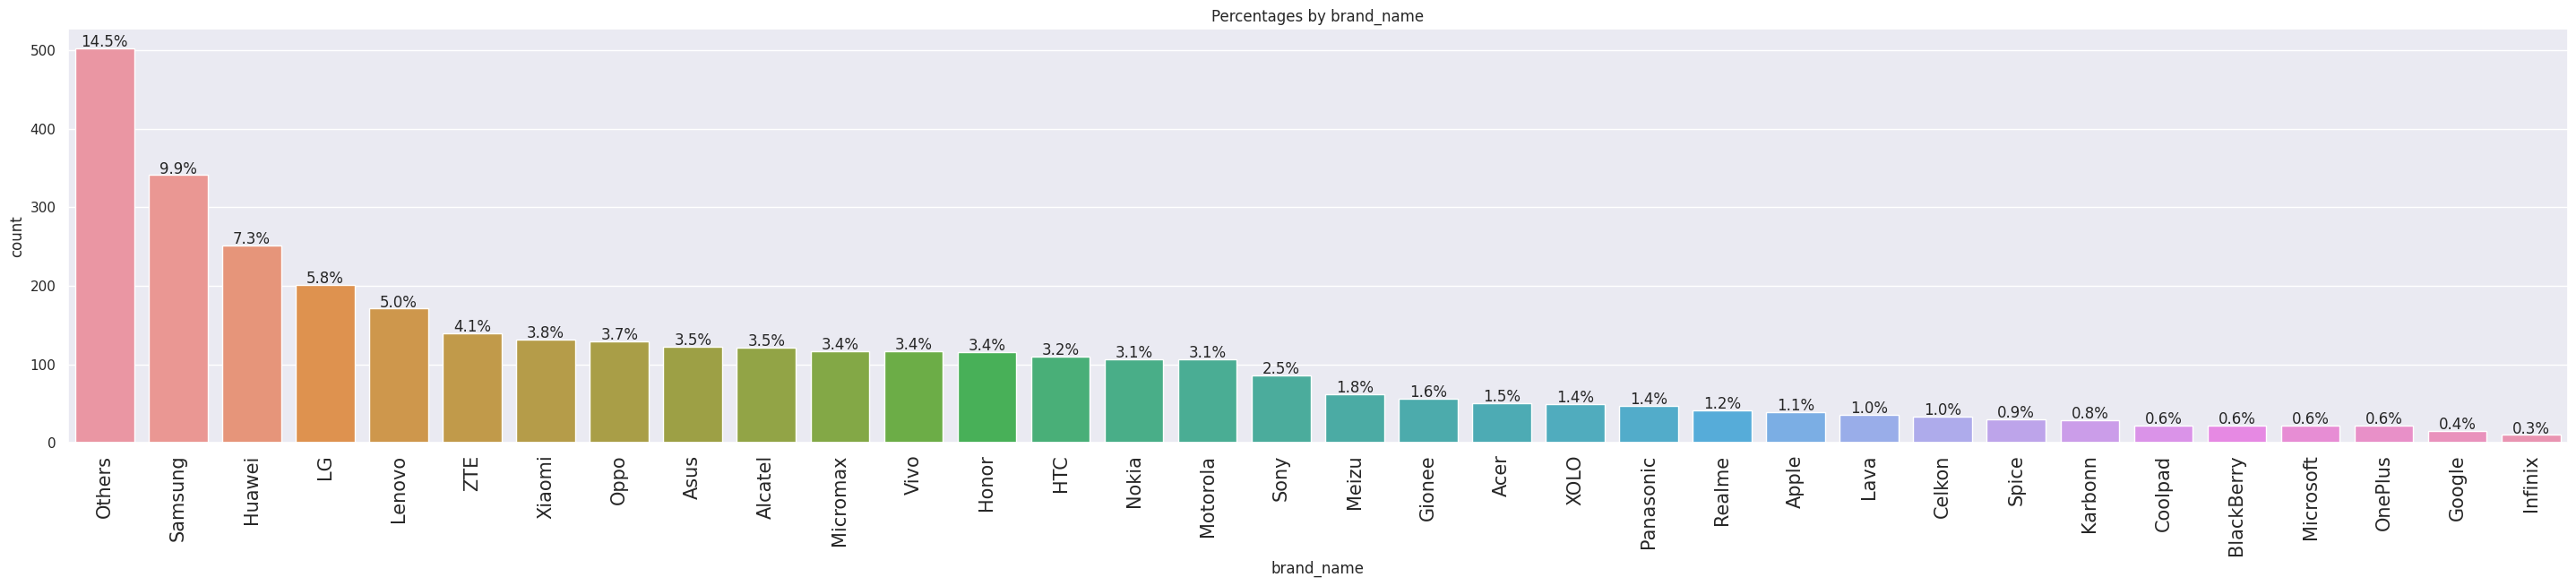

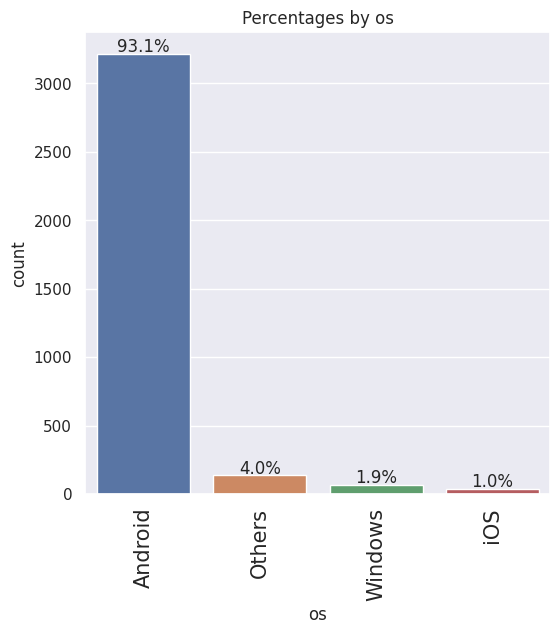

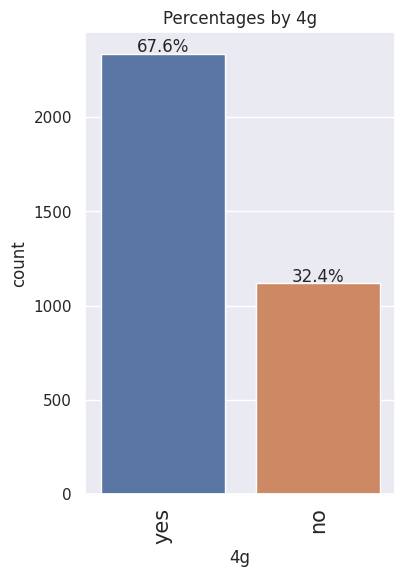

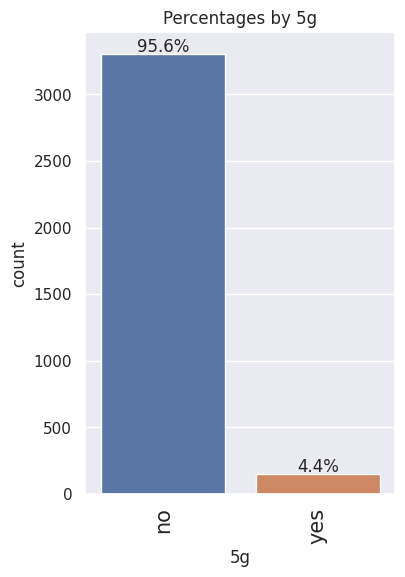

In [117]:
#bar plots of percentages of each categorical feature
object_cols = devices_data.select_dtypes(include='object').columns


for  col in object_cols:   
    labeled_countplot(devices_data, col, True, title=f"Percentages by {col}")

Univariate Analysis of Categoric variables observation:
* The Samsung brand, Android os and 4g used devices do stand out as the most sought after phones
    * Android constitutes 93.1% of all devices
    * Samsung 9.9% with Huwawei slightly behind at 7.3% of the market share
    * 4g 67.6% of the devices
* Used devices with 4g are twice as much as those without
* Significantly few phones (4.4%) have 5g
* iOS and windows devices are not very popular at 1% and 1.9% respectively

### Bivariate Analysis

a. Correlation Check for normalised used price against other variables

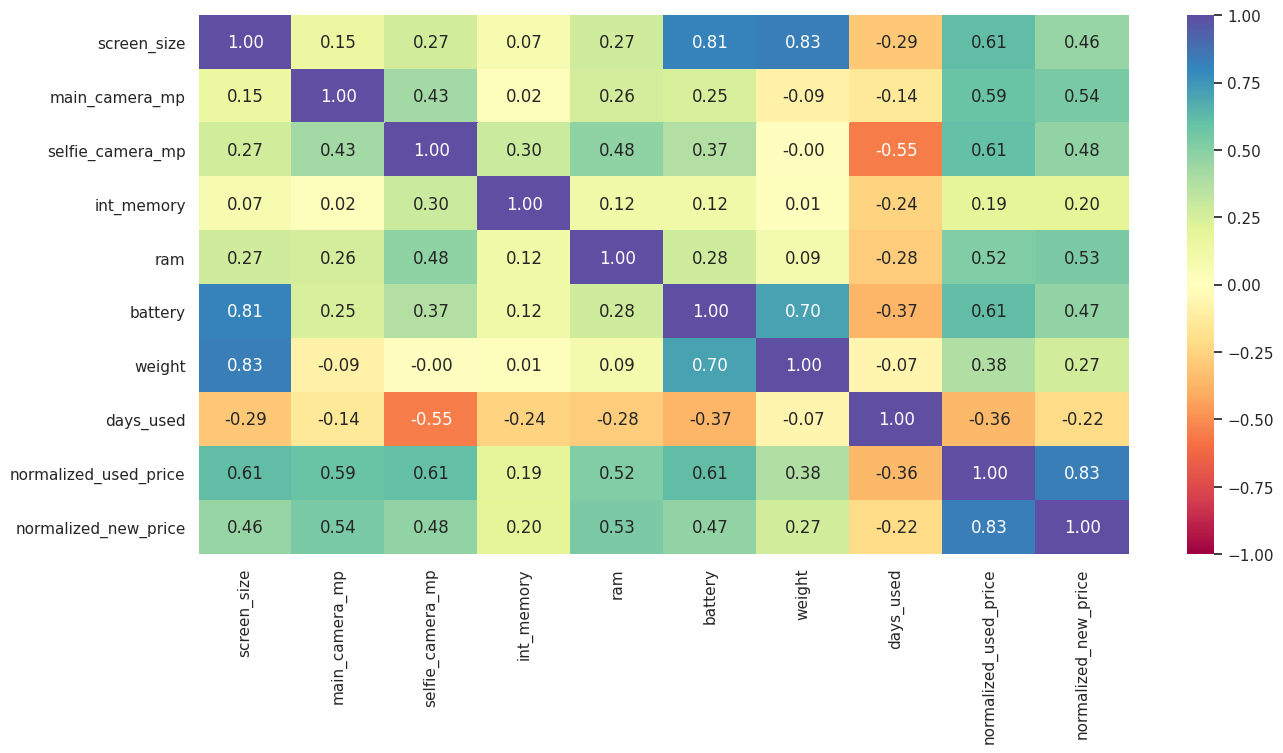

In [8]:
cols_list = devices_data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    devices_data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Correlation Observation:
1. Three features stand out as the most co-related and need to be noted for potential multicollinerality. 
* Battery and screen_size 
* Weight and screen size
* Battery and weight
2. The normalized_used_price has good co-relation with screen_size, main_camera, selfie_camera, battery and the normalized_new price. 

 b. Ram VS Brand: The amount of RAM is important for the smooth functioning of a device. 

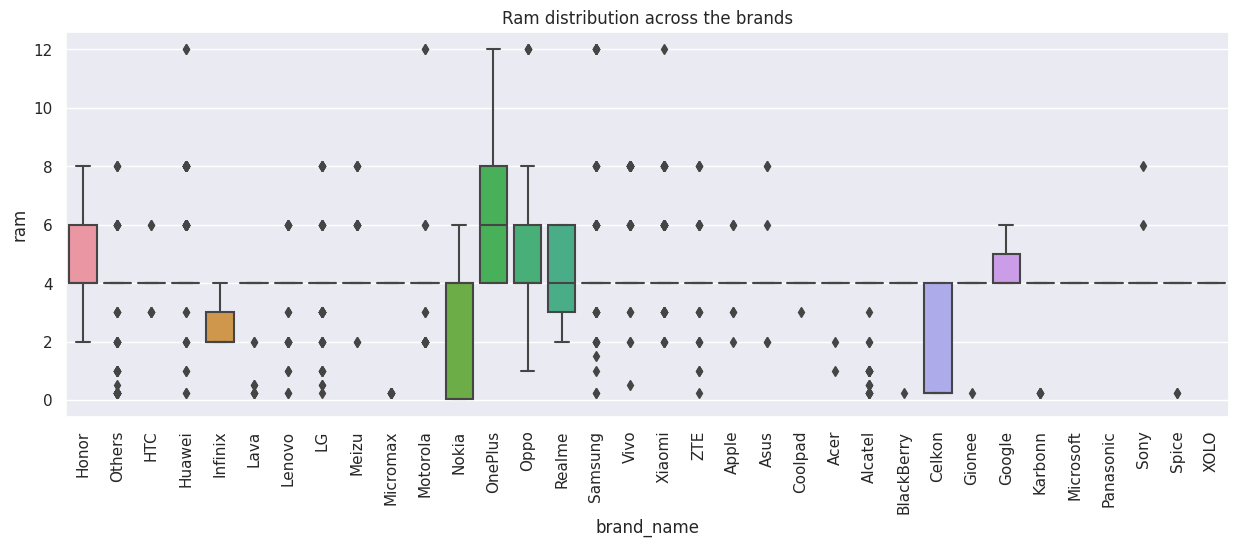

In [54]:
plt.figure(figsize=(15, 5))
plt.title("Ram distribution across the brands")
sns.boxplot(data=devices_data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

Observation:
* Ram tends to be the same across all brands for all devices at 4GB
* Oneplus brand is inclined towards more RAM having a minimum cap of 4 and maximum of 12.
* The Celkon and Infinix brands on the other hand are inclined towards less RAM with a maximum of 4GB.
* The memory range for Google and infinix are the smallest of only 2GB while Huawei and Samsung offer a wide range from 0GB to 12GB of ram

c. weight distribution for phones and tablets offering large batteries (more than 4500 mAh)

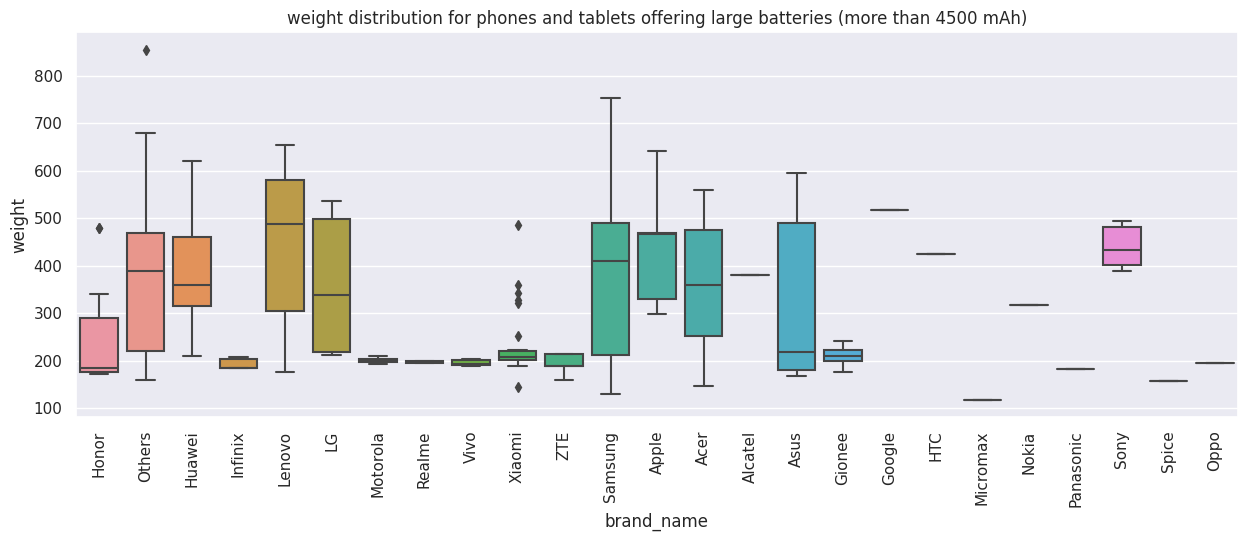

In [53]:
##  boxplot for 'brand_name' vs 'weight'
df_large_battery = devices_data[devices_data.battery > 4500]

plt.figure(figsize=(15, 5))
plt.title("weight distribution for phones and tablets offering large batteries (more than 4500 mAh)")
sns.boxplot(data=df_large_battery, x="brand_name", y="weight") 
plt.xticks(rotation=90)
plt.show()

Observation:
* There is no uniformity in the variation of weight among the different brands for higher battery capacity.
* Some brands have the same weight (HTC, Google, Nokia etc). Other brand names have very small weight range (Motorolla, ZTE, Vivo etc) while the rest have significantly large weight range (Samsung, Lenovo, Asus, LG etc)

d. Number of phones and tablets across different brands with a screen size larger than 6 inches

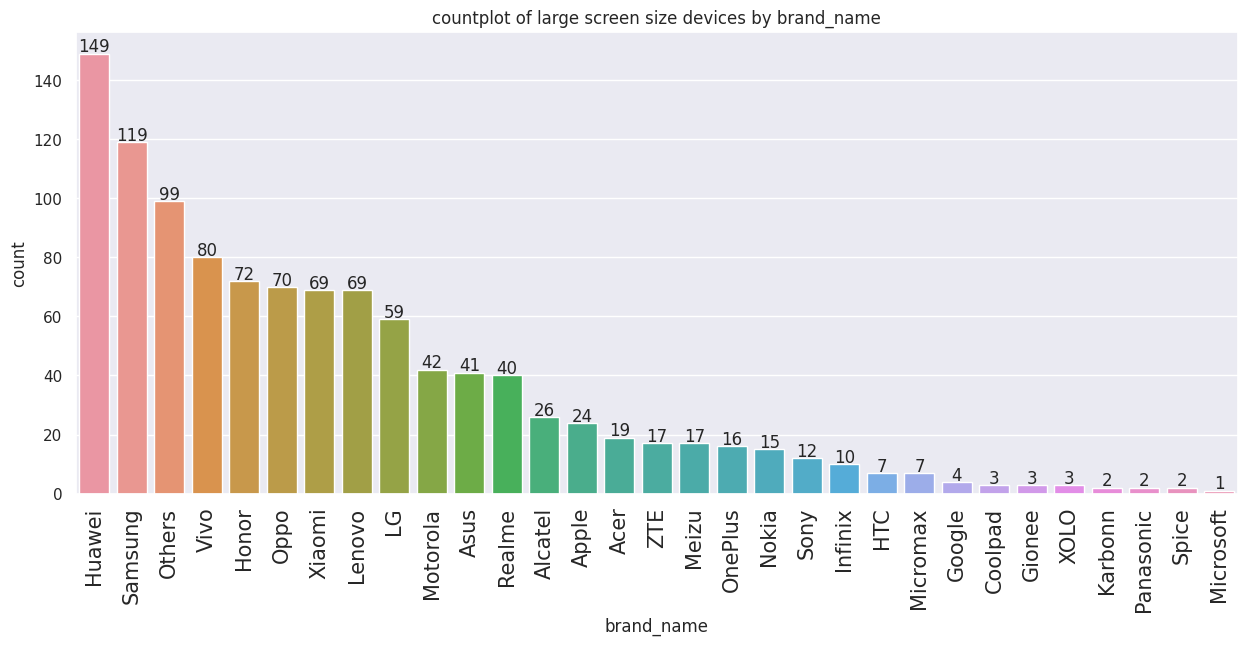

In [52]:
# 
df_large_screen = devices_data[devices_data.screen_size > 6 * 2.54]# convert 6inches to cms since screen size is in cm

#countplot of large screen size devices by brand_name
labeled_countplot(df_large_screen, 'brand_name', False, title="countplot of large screen size devices by brand_name")

Observation
* Huwawei (149) and Samsung(119) have the largest number of large screen size used devices on the market
* Other top contenders are Vivo, Oppo, Lenovo and Xiaomi

e. distribution of devices offering good selfie and main cameras across brands

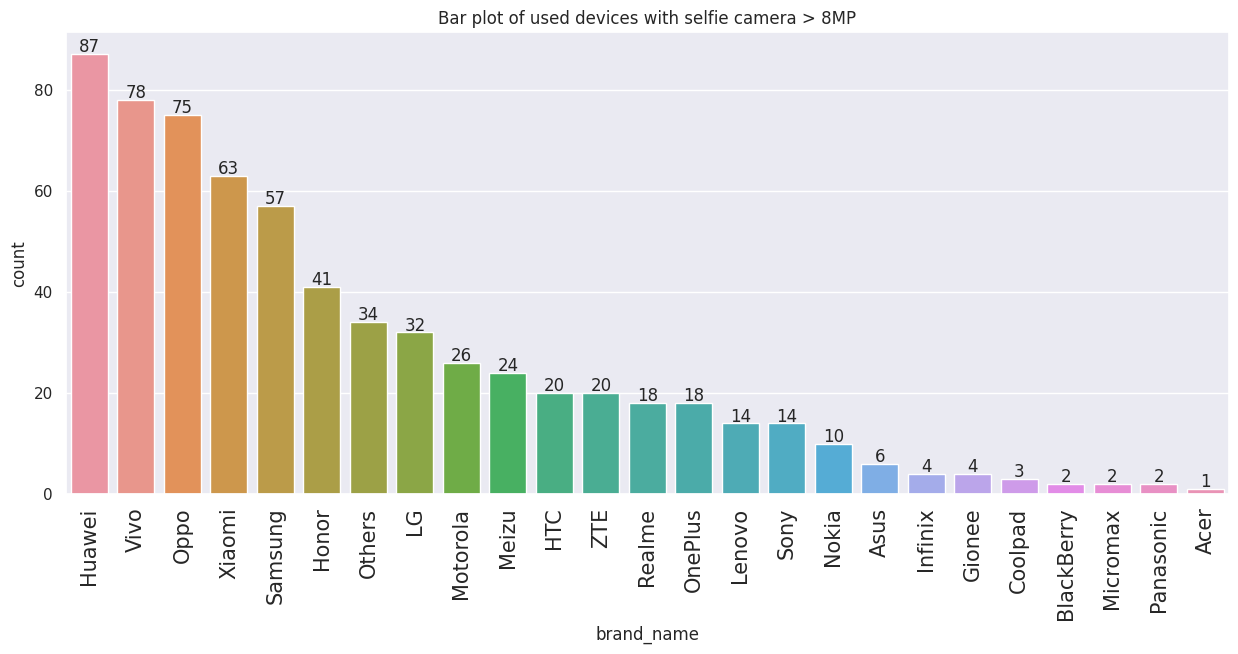

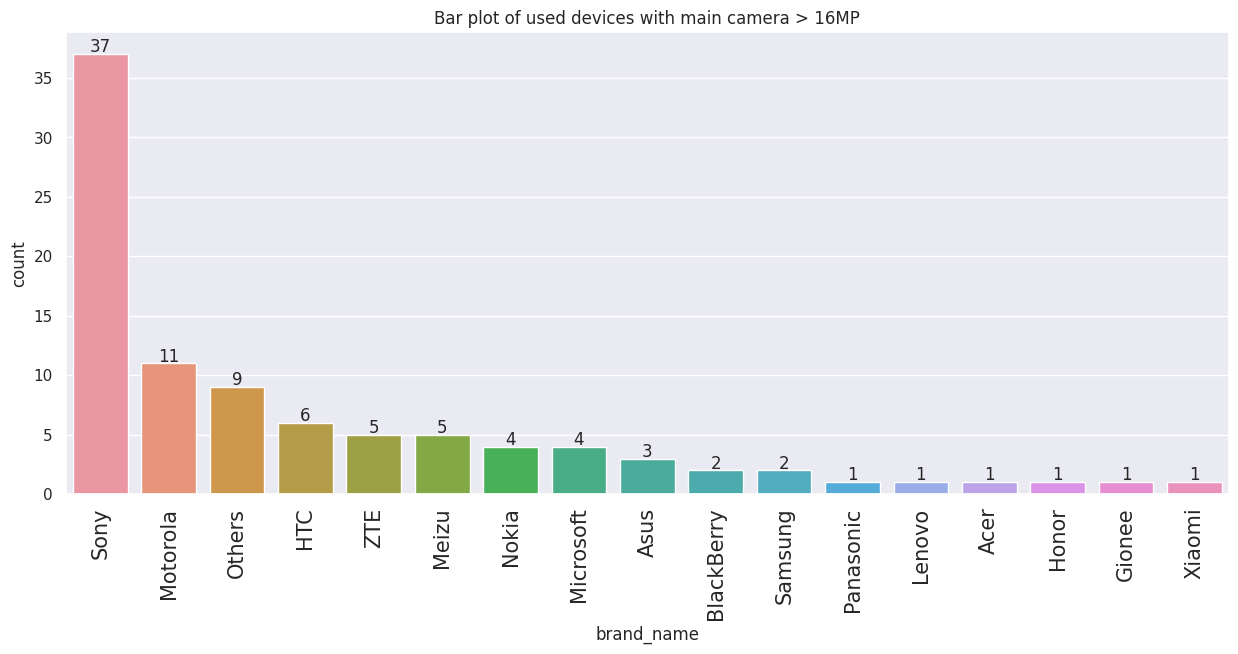

In [48]:
# data for good selfie cameras
df_selfie_camera = devices_data[devices_data.selfie_camera_mp > 8]

#countplot of good selfie camera devices by brand_name
labeled_countplot(df_selfie_camera, 'brand_name', False, title="Bar plot of used devices with selfie camera > 8MP")

#countplot of good main camera devices by brand_name
df_main_camera = devices_data[devices_data.main_camera_mp > 16]
labeled_countplot(df_main_camera, 'brand_name', False, title="Bar plot of used devices with main camera > 16MP")

Observation:
* Huawei, Sony and Vivo brands have the most number of great selfie cameras
* Sony has the most number of great main camera devices which is 37
* While Samsung is the most popular phone, it does not have the best of the cameras

g. Price distribution across the years


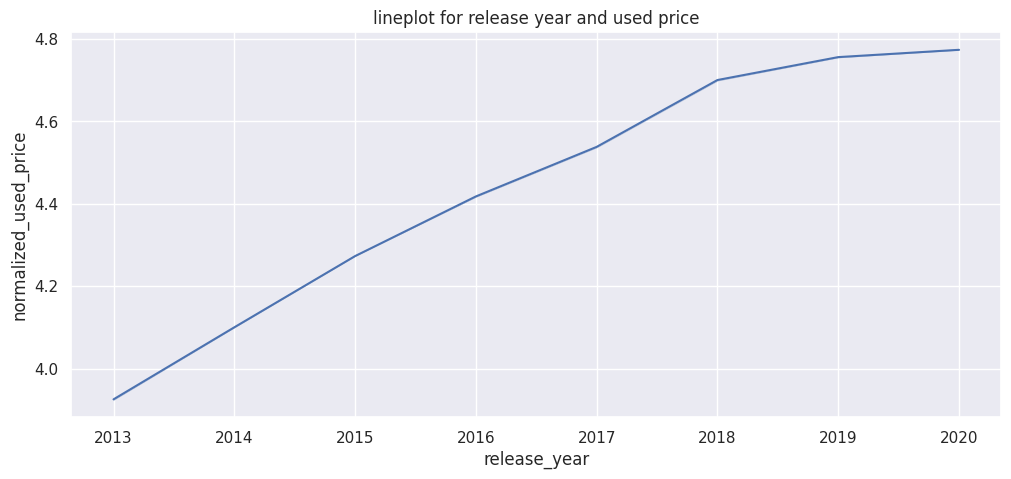

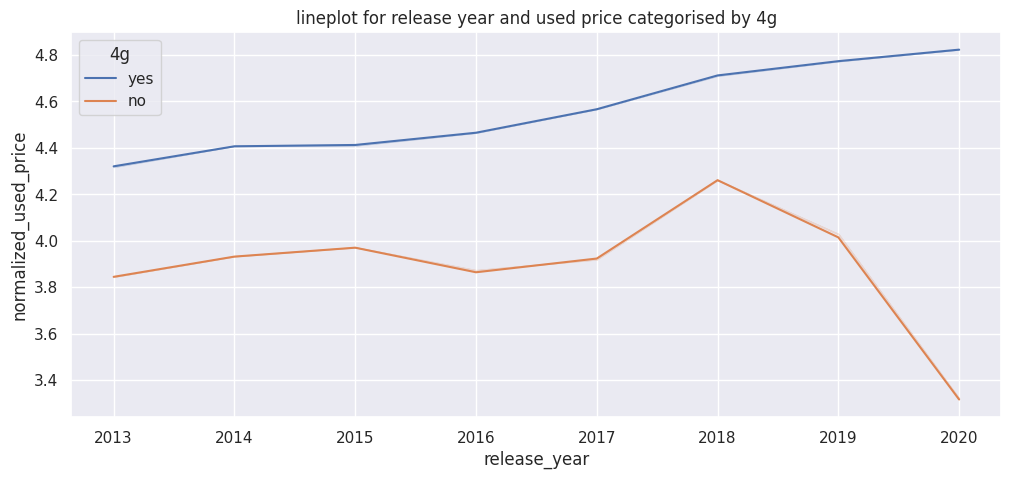

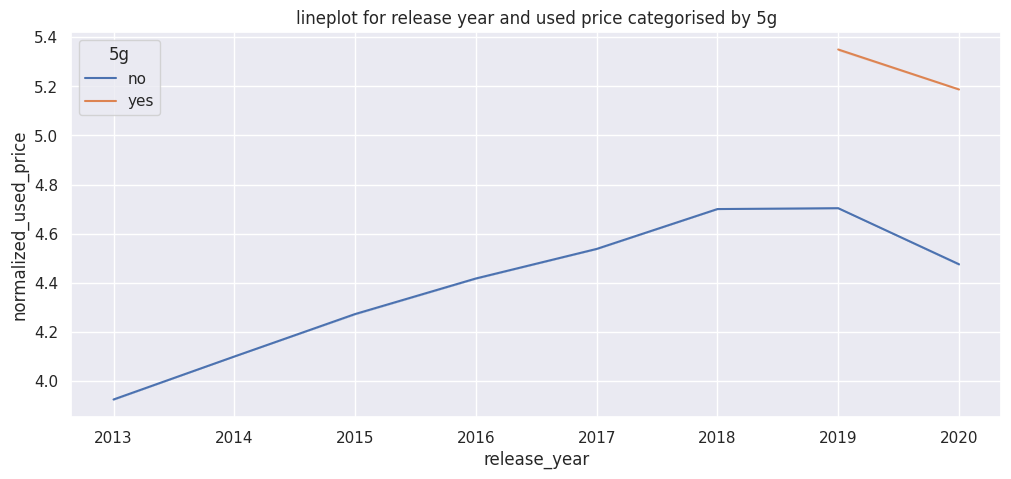

In [70]:
plt.figure(figsize=(12, 5))
## lineplot for release year and used price
plt.title("lineplot for release year and used price")
sns.lineplot(data=devices_data, y="normalized_used_price", x="release_year", ci=False) 
plt.show()

## lineplot for release year and used price categorised by 4g
plt.figure(figsize=(12, 5))
plt.title("lineplot for release year and used price categorised by 4g")
sns.lineplot(data=devices_data, y="normalized_used_price", x="release_year", hue="4g", ci=False)
plt.show()

## lineplot for release year and used price categorised by 5g
plt.figure(figsize=(12, 5))
plt.title("lineplot for release year and used price categorised by 5g")
sns.lineplot(data=devices_data, y="normalized_used_price", x="release_year", hue="5g", ci=False)
plt.show()

Observation:
* Generally, the price of used devices has been increasing since 2013
* While phones with 4g have been steadily increasing the price, those without 4g have experienced a sharp decline in price since 2018.
* With regards to 5g, the price for used devices has been on the decrease wether the phone has 5g or not. 

h. Price comparison between 4g and 5g

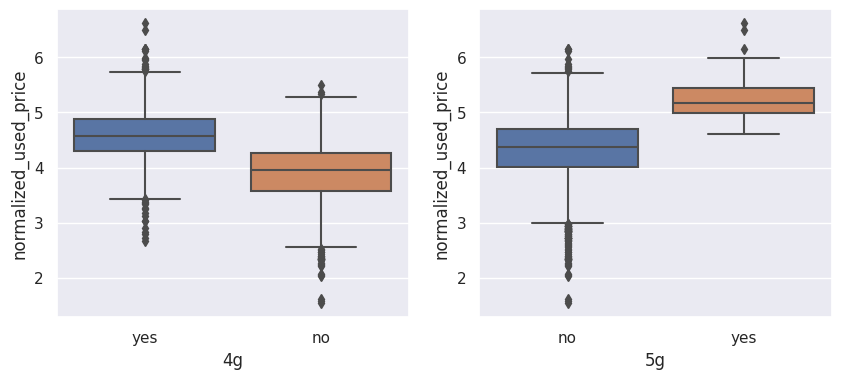

In [51]:
plt.figure(figsize=(10, 4))

#Box plot for normalised used prize against 4g
plt.subplot(121)
sns.boxplot(data=devices_data, x="4g", y="normalized_used_price")

#Box plot for normalised used prize against 5g
plt.subplot(122)
sns.boxplot(data=devices_data, x="5g", y="normalized_used_price")

plt.show()

Observation:
On average, phones with 5g are the most expensive while phones without 4g are the least costly

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### a. Missing Value Treatment
* Check for any missing vaues

In [65]:
devices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation: There are columns whose count is less than the total 3454 observed earlier

In [66]:
devices_data.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation: 
* A total of 6columns have missing data.
* Considering the total number of missing columns is small, these can be treated by imputing median for each feature

In [67]:
# create a copy of the data for manipulation
df = devices_data.copy()

In [68]:
# list of columns to treat missing data
missing_cols = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
## for each column, impute missing values in cols_impute median by grouping the data on release year and brand name
for col in missing_cols:
    df[col] = df[col].fillna(
        value=df.groupby(['release_year', 'brand_name'])[col].transform("median")
    )   
# checking for missing values
df.isna().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation:
* There still 4 more columns. 
* We do this again grouping by `brand_name` only since some years do not exist in our data set

In [69]:
# list of columns to treat missing data
missing_cols = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
## for each column, impute missing values in cols_impute median by grouping the data on brand name
for col in missing_cols:
    df[col] = df[col].fillna(
        value=df.groupby('brand_name')[col].transform("median")
    )   
# checking for missing values
df.isna().sum() 

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Observation:
* `main_camera_mp` is the only one left
* This will be fill in by the column median.

In [70]:
 ## impute the data with median
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].median())

# checking for missing values
df.isna().sum() 

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

Observation:
* All columns have been treated for missing values.

## EDA
* We will now check our data again for sanity

- It is a good idea to explore the data once again after manipulating it.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation:
* Non null count shows there are no missing values
* There are 9 floats, 2 ints and 4 objects
* Memory usage is still small at 404KB

### b. Feature engineering
* The release_year column needs feature engineering as the value is not numeric
* We will create a new column, years_since_release, capping on the year 2021 which has been mentioned as the data collection year
* We wil then drop the release_year column for our final data 

In [72]:
df["years_since_release"] = 2021 - df["release_year"] #numeric
df.drop("release_year", axis=1, inplace=True)
df["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

Feature Observation:
* The new column is of type float
* On average used devices are 5.03 years since release 
* The minimum period is 1year and the longest is 8years

### c. Outlier detection and treatment 

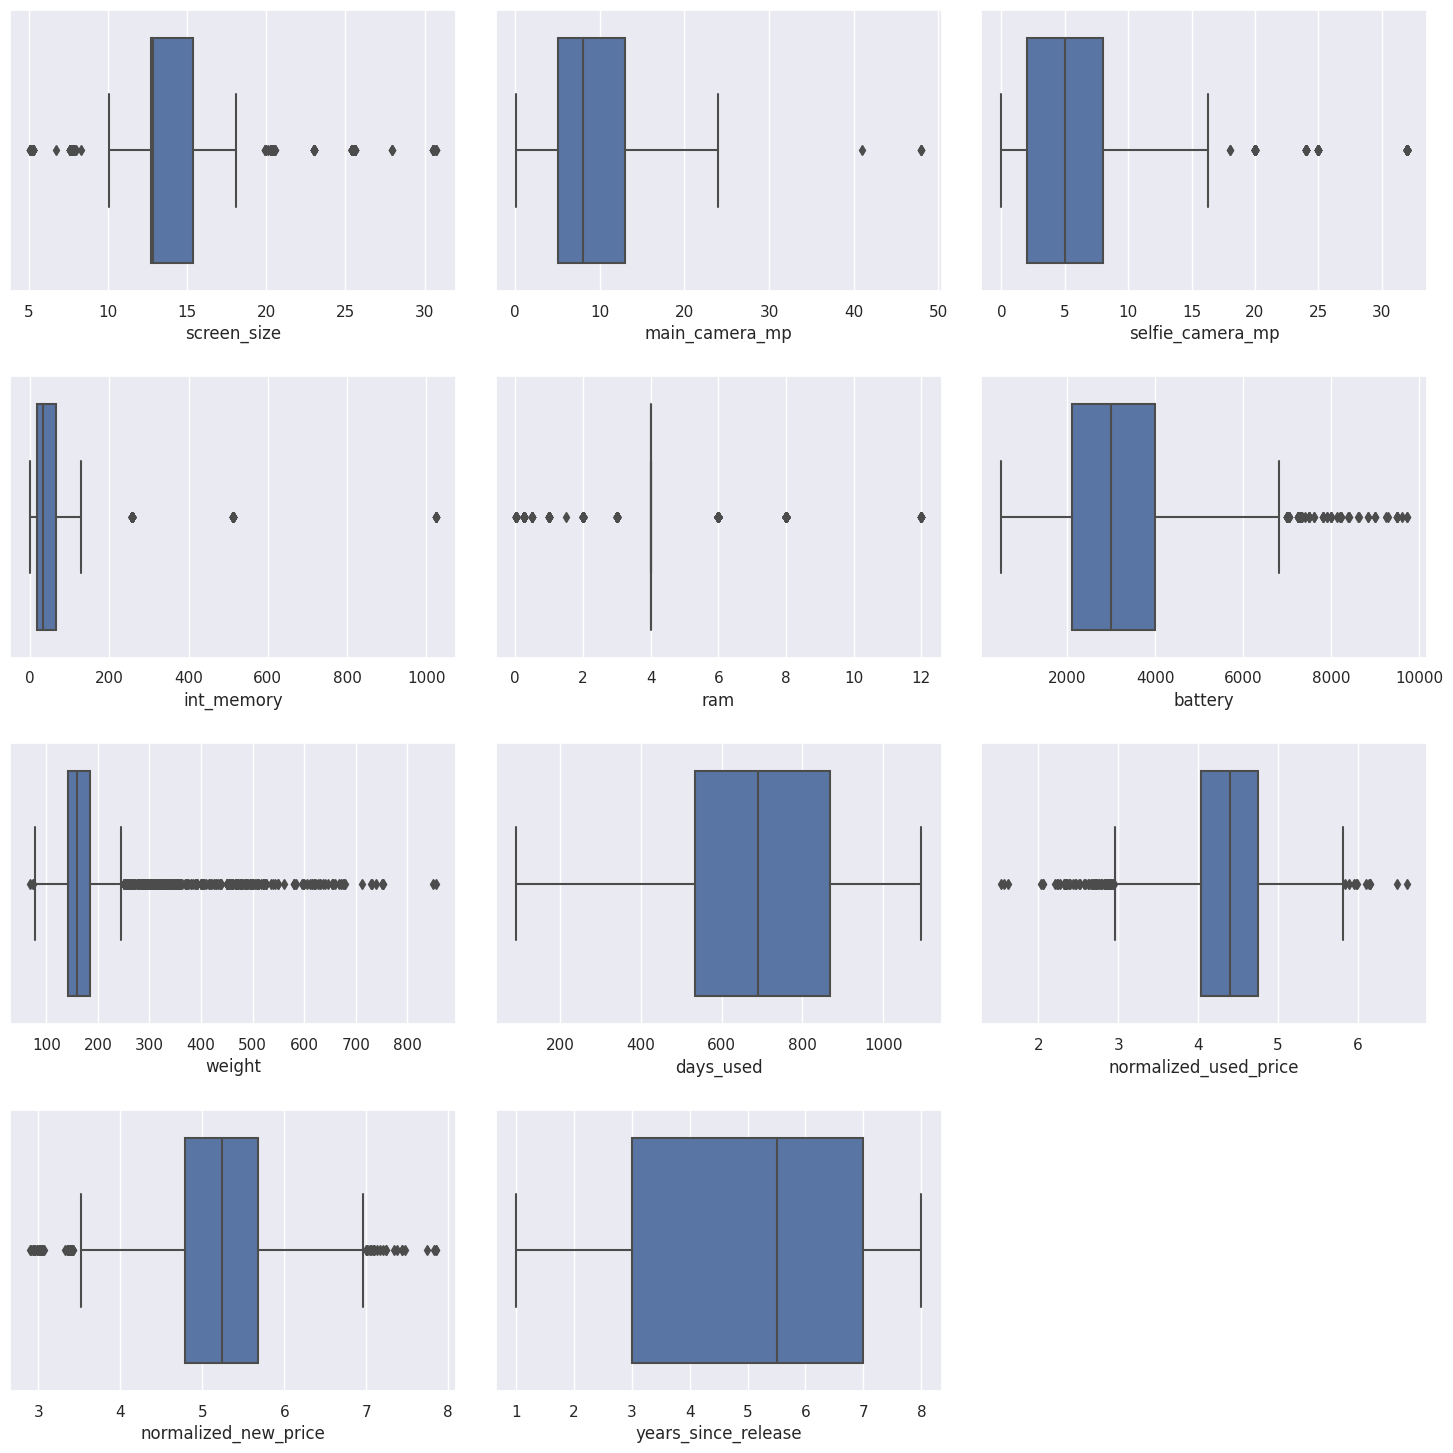

In [115]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

_Observation_
* From the inital EDA, it has been noted that most of the features have outliers expect a few columns
* It is an indication of the need for further categorisation of the data. As such outliers will not be treated 

### d. Preparing data for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

i. Defining the dependent and independent variable

In [73]:
## Defining the dependent and independent variables
x = df.drop("normalized_used_price", axis=1)
y = df["normalized_used_price"]

print(x.shape)
print()
print(y.shape)

(3454, 14)

(3454,)


Observation: The dependent and independent variable have same number of rows

ii. Adding the intercept to the independent data

In [74]:
# adding the intercept to data
x = sm.add_constant(x)
x.head()

,const,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release
0,1.0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,1.0,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,1.0,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,1.0,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,1.0,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


iii. defining dummy variables for all the categoric variables

In [75]:
# creating dummy variables
x = pd.get_dummies(
    x,
    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

x.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


Dummy Variables Observation: There is now a total of 49 columns

iv. Splitting the data into train and test set

In [76]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
print("train set shape: ", x_train.shape)
print("test set shape: ", x_test.shape)

train set shape:  (2417, 49)
test set shape:  (1037, 49)


## Model Building - Linear Regression

In [77]:
## fitting OLS model
olsmodel1 = sm.OLS(y_train, x_train).fit() 

print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                           21:25:01   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Linear Regression Model Observations

R-squared

* R-squared of the model is 0.845 and adjusted R-squared is 0.842, which shows that the model is able to explain ~85% variance in the data. This is quite good.

Coefficients
* A unit increase in screen_size, main_camera_mp, selfie_camera_mp, ram and normalized_new_price result in a slight unit increase of the device's used price for each feature , all other variables remaining constant.
* A unit increase in the days used will result in a 0.000042 unit decrease in the normalized_used_price, all other variables remaining constant.
* The same applies for years_since_release which result in 0.024 decrease in normalised_used_price all other variables remaining constant
* However as observed earlier in correlation analysis, battery, weight and screen_size have the same positive correlation with normalized_used_price and as such should have same effect here by having same sign. This is not the case here as battery has negative effect. Implying the presence of multicollinearlity

p-values (P > |t|)

* All the brand features have p-value above 0.05. If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.
* However due to the presence of multicollinearlity, these values can change and we cannot drop the predictors yet. We need to ensure that there is no multicollinearity in order to interpret the p-values.

## Model Performance Check

In [79]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

Checking model performance on train set (seen 70% data)

In [80]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


Checking model performance on test set (seen 30% data)

In [81]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) 
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


Model Performance Observation:
* The adjusted r-squared for the train and test set are comparable implying that the model is able to generalise on data
* There is no overfitting

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
- In all there are five assumptions to be checked

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of residuals (error terms)**

4. **Normality of residuals (error terms)**

5. **No Heteroscedasticity**

### 1. Checking for Multicollinearity

multicollinearity will be tested using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [82]:
#defining function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [83]:
#checking vif
vifs = checking_vif(x_train)  
vifs.loc[vifs["VIF"] > 5].sort_values("VIF", ascending=False)

,feature,VIF
0,const,227.744081
12,brand_name_Apple,13.057668
46,os_iOS,11.784684
34,brand_name_Others,9.711034
1,screen_size,7.677290
37,brand_name_Samsung,7.539866
7,weight,6.396749
21,brand_name_Huawei,5.983852


VIF Observation:
* The VIF values indicate that the features brand_name_apple, os_iOS, brand_name_Others, screen_size, brand_name_Samsung, brand_name_Huawei and weight are correlated with one or more independent features.

* To treat multicollinearity, we will have to drop one or more of the correlated features 
* We will drop the variable that has the least impact on the adjusted R-squared of the model first. i.e brand_name_Apple

#### a. Dropping brand_name_Apple

In [84]:
x_train_a = x_train.drop(["brand_name_Apple"], axis=1)
olsmod_a = sm.OLS(y_train, x_train_a)
olsres_a = olsmod_a.fit()
print(
    "R-squared:",
    np.round(olsres_a.rsquared, 3), 
    "\nAdjusted R-squared:",
    np.round(olsres_a.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


Observation:
Adj. R-squared has remained almost the same after dropping brand_name_Apple

#### b. Dropping brand_name_Others

In [85]:
x_train_b = x_train.drop(["brand_name_Others"], axis=1)
olsmod_b = sm.OLS(y_train, x_train_b)
olsres_b = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_b.rsquared, 3), 
    "\nAdjusted R-squared:",
    np.round(olsres_b.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


_Observation:_  
Adj. R-squared has remained almost the same after dropping brand_name_Others

#### c. Dropping brand_name_Samsung

In [86]:
x_train_c = x_train.drop(["brand_name_Samsung"], axis=1)
olsmod_c = sm.OLS(y_train, x_train_c)
olsres_c = olsmod_c.fit()
print(
    "R-squared:",
    np.round(olsres_c.rsquared, 3), 
    "\nAdjusted R-squared:",
    np.round(olsres_c.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


_Observation:_  
Adj. R-squared has remained almost the same after dropping brand_name_Samsung

d. Dropping os_iOS

In [87]:
x_train_d = x_train.drop(["os_iOS"], axis=1)
olsmod_d = sm.OLS(y_train, x_train_d)
olsres_d = olsmod_d.fit()
print(
    "R-squared:",
    np.round(olsres_d.rsquared, 3), 
    "\nAdjusted R-squared:",
    np.round(olsres_d.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


_Observation:_  
Adj. R-squared has remained almost the same after dropping os_iOS

e. Dropping brand_name_Huawei

In [88]:
x_train_e = x_train.drop(["brand_name_Huawei"], axis=1)
olsmod_e = sm.OLS(y_train, x_train_e)
olsres_e = olsmod_e.fit()
print(
    "R-squared:",
    np.round(olsres_e.rsquared, 3), 
    "\nAdjusted R-squared:",
    np.round(olsres_e.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


_Observation:_  
Adj. R-squared has remained almost the same after dropping brand_name_Huawei

f. Dropping screen_size

In [89]:
x_train_f = x_train.drop(["screen_size"], axis=1)
olsmod_f = sm.OLS(y_train, x_train_f)
olsres_f = olsmod_f.fit()
print(
    "R-squared:",
    np.round(olsres_f.rsquared, 3), 
    "\nAdjusted R-squared:",
    np.round(olsres_f.rsquared_adj, 3),
)

R-squared: 0.842 
Adjusted R-squared: 0.838


_Observation:_  
Adj. R-squared has dropped by 0.004 after dropping screen size

g. Dropping weight

In [90]:
x_train_g = x_train.drop(["screen_size"], axis=1)
olsmod_g = sm.OLS(y_train, x_train_g)
olsres_g = olsmod_g.fit()
print(
    "R-squared:",
    np.round(olsres_g.rsquared, 3), 
    "\nAdjusted R-squared:",
    np.round(olsres_g.rsquared_adj, 3),
)

R-squared: 0.842 
Adjusted R-squared: 0.838


_Observation:_  
Adj. R-squared has dropped by 0.004 after dropping weight

### Dropping related columns as observed

a. SInce brand_name_Apple had no significant effect on Adj. R-squared , it will be dropped from train set

In [91]:
x_train_new = x_train.drop(["brand_name_Apple"], axis=1)
x_test_new = x_test.drop(["brand_name_Apple"], axis=1)

Checking for multicollinearlity after dropping brand_name_Apple

In [92]:

vifs = checking_vif(x_train_new)  
vifs.loc[vifs["VIF"] > 5].sort_values("VIF", ascending=False)


,feature,VIF
0,const,227.303871
33,brand_name_Others,9.075554
1,screen_size,7.643583
36,brand_name_Samsung,6.991538
7,weight,6.394014
20,brand_name_Huawei,5.581714


**_Observation_ Multicollinearity is still present in our data.** 

b. Dropping the brand_name_Others column as well.

In [93]:
# drop brand_name_Others
x_train_new = x_train_new.drop(["brand_name_Others"], axis=1)
x_test_new = x_test_new.drop(["brand_name_Others"], axis=1)

#checking multicolinearity after dropping brand_name_Others
vifs = checking_vif(x_train_new)  
vifs.loc[vifs["VIF"] > 5].sort_values("VIF", ascending=False)

,feature,VIF
0,const,150.393434
1,screen_size,7.570160
7,weight,6.368105


We still have multicollinearity. We can drop weight 

In [94]:
x_train_new = x_train_new.drop(["weight"], axis=1)
x_test_new = x_test_new.drop(["weight"], axis=1)

#checking multicollinearity after dropping weight
vifs = checking_vif(x_train_new)  
vifs.loc[vifs["VIF"] > 5].sort_values("VIF", ascending=False)

,feature,VIF
0,const,135.987622


_Observation_:
There are no more features with VIF > 5. THis implys there is no more multicollinearity in the data. The p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

### Dropping high p-value variable

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.


In [96]:
#Build the new model without multicollinearity
olsmod_new = sm.OLS(y_train, x_train_new)
olsres_new = olsmod_new.fit()
print(olsres_new.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.1
Date:                   Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                           21:36:35   Log-Likelihood:                 95.572
No. Observations:                   2417   AIC:                            -99.14
Df Residuals:                       2371   BIC:                             167.2
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


_Observation:_ We have several features with high p-value. These can only be looped through for efficient treatment

In [95]:
# initial list of columns
predictors = x_train_new.copy() 
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# iterate through all the columns as stated above
while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


Building the new model with the selected significant features only

In [99]:
x_train2 = x_train_new[selected_features] 
x_test2 = x_test_new[selected_features] 

olsmodel2 = sm.OLS(y_train, x_train2).fit() 
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                           21:43:46   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### _Observation_
**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.842 to 0.839). This shows that these variables did not have much predictive power.**

### 2. Checking for Linearity of variables

### 3. Checking for independence of residuals

The above two tests will be carried out simultaneously

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

### Data preparation for test for linearity and independence


In [101]:
# creating dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.858599,0.228888
1525,4.448399,4.613833,-0.165434
1128,4.315353,4.277568,0.037785
3003,4.282068,4.252225,0.029844
2907,4.456438,4.440283,0.016156


PLotting the fitted values vs residulas

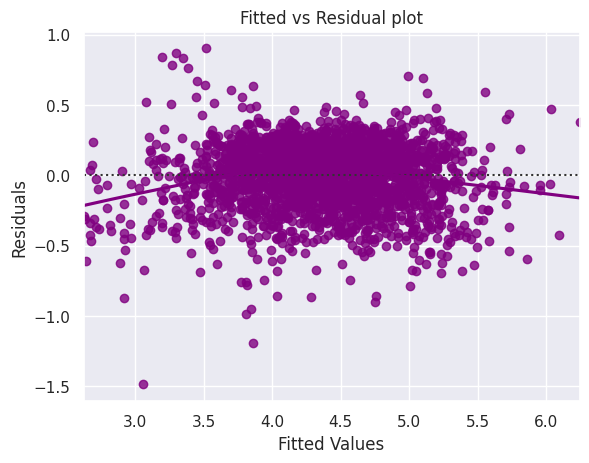

In [102]:
# plotting the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

_Observation_
THere is almost no pattern in plot hence  the data points seem to be independent and randomly distributed

### 4. Checking for normality of residuals (error terms)

- This will be tested by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

a. Distribution of residuals

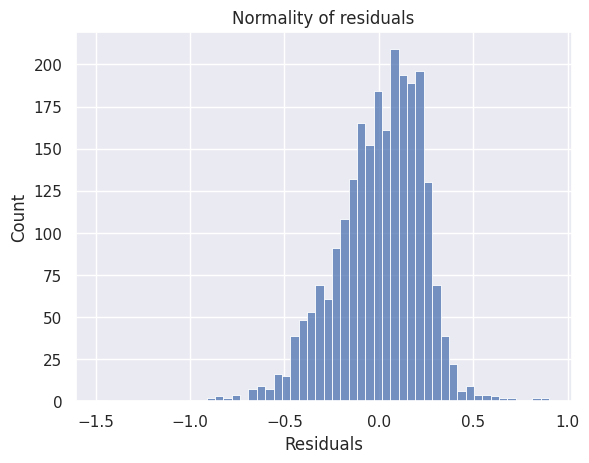

In [103]:
## histplot for the distribution of residuals
sns.histplot(data=df_pred, x="Residuals") 
plt.title("Normality of residuals")
plt.show()

_Observation_:
The residuals are almost normally distributed with a slight skewedness to the left

b. Q-Q plot of residuals

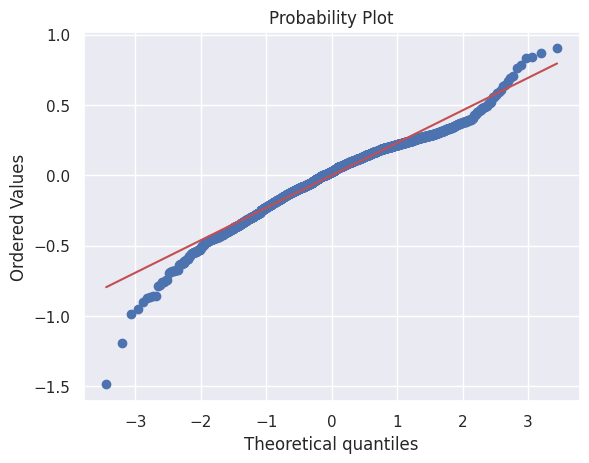

In [104]:
import pylab
import scipy.stats as stats
##  Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) 
plt.show()

_Observation_
* Most of the points are lying on the straight line in QQ plot 

c. Shapiro-Wilk test

In [107]:
## applying the Shapiro-Wilks test
statistic, pvalue = stats.shapiro(df_pred["Residuals"]) 
print("Shapiro Result: statistic(", statistic, ") p-value :", pvalue)

Shapiro Result: statistic( 0.9724023342132568 ) p-value : 3.463951697107566e-21


* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

### 5. Checking for homoscedasticity


- This will be done using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [108]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## applying the Goldfeldquandt test on train data
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2) 
lzip(name, test)

[('F statistic', 1.0554902509992028), ('p-value', 0.17520491832996798)]

_Observation_:
Since the p-value > 0.05, the residuals are homoscedastic

## Final Model

In [109]:
## fitting the final model
olsmodel_final = sm.OLS(y_train, x_train2).fit() 
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                           22:29:51   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Final Model Parameters

In [112]:
olsmodel_final.params

const                   1.211877
screen_size             0.043252
main_camera_mp          0.018873
selfie_camera_mp        0.013121
ram                     0.017212
days_used               0.000062
normalized_new_price    0.428185
years_since_release    -0.018109
brand_name_Lenovo       0.048897
brand_name_Nokia        0.073342
brand_name_Xiaomi       0.085171
4g_yes                  0.036881
dtype: float64

_Observation_
- Effectively a total of 11 features significantly influence the price of a used device

### Checking Final Model Performance

In [110]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train2, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233989,0.183177,0.839296,0.838494,4.392265


In [111]:
# checking model performance on test set (seen 30% data)
print("Training Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test2, y_test)
olsmodel_final_test_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238554,0.185,0.84222,0.840371,4.500963


_Final Model Observations_
* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict normalized_used_price within a mean error of 18.5 units on the test data.
* Hence, we can conclude the model "olsmodel_final" is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

The task at hand was to
- analyze the data provided 
- build a linear regression model to predict the price of a used phone/tablet and
- identify factors that significantly influence the price of a used device


1. Most of the features have many outliers. This indicates that there may be another feature necessary for further categorisation such as device type (phone or tablet). Phones and tablet tend to differ significantly in weight, screen size, battery capacity, selfie camera as they serve different purposes.
    - It is recommended that Recell gathers more data to further analyse the used devices distribution and reach more insightful results.
2. There are many factors that influence the price of a used device. 
    - To make the most of the market share, it is recommended that Recell stream line the devices they are looking into. For instance, they can focus on the most popular brands (Samsung, Huawei, LG, Lenovo) or devices with 4g as they are the most sought after. This will ensure profitability
3. The model built here is the best, given the data provided, to predict the price of a used phone or tablet.
    - It is recommended that Recell adopt that model for optimum profitability.

___